# 🫀 Heart Disease Prediction - Enhanced Analysis
**Author:** AyushMaurya13  
**Date:** 2025-11-01 20:27:33  
**Version:** 2.0

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, ConfusionMatrixDisplay)
import joblib
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")
print(f"📅 Date: 2025-11-01 20:27:33")
print(f"👤 User: AyushMaurya13")

✅ All libraries imported successfully!
📅 Date: 2025-11-01 20:27:33
👤 User: AyushMaurya13


## 2. Load Dataset

In [2]:
heart_data = pd.read_csv('heart_disease_data.csv')

print(f"Dataset Shape: {heart_data.shape}")
print(f"\nFirst 5 rows:")
heart_data.head()

Dataset Shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3. Data Quality Check

In [5]:
# Missing values
print("Missing Values:")
print(heart_data.isnull().sum())

# Duplicates
print(f"\nDuplicate Rows: {heart_data.duplicated().sum()}")

# Target distribution
print("\nTarget Distribution:")
print(heart_data['target'].value_counts())
print(f"\nClass Balance: {heart_data['target'].value_counts()[1] / heart_data['target'].value_counts()[0]:.2f}")

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate Rows: 1

Target Distribution:
target
1    165
0    138
Name: count, dtype: int64

Class Balance: 1.20


## 4. Exploratory Data Analysis (EDA)

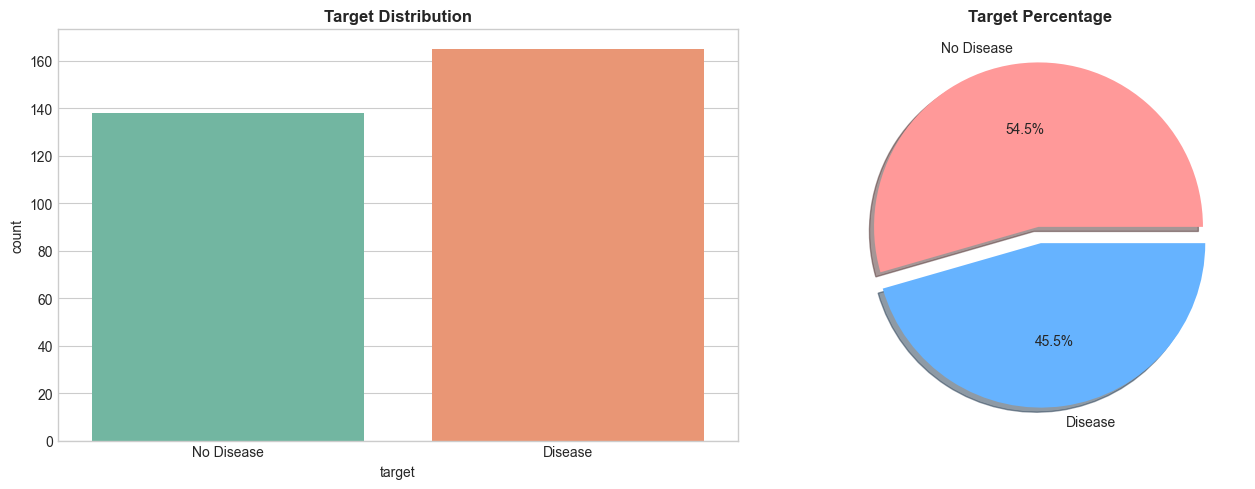

In [6]:
# Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=heart_data, x='target', ax=axes[0], palette='Set2')
axes[0].set_title('Target Distribution', fontweight='bold')
axes[0].set_xticklabels(['No Disease', 'Disease'])

target_counts = heart_data['target'].value_counts()
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
            colors=['#ff9999', '#66b3ff'], explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Target Percentage', fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

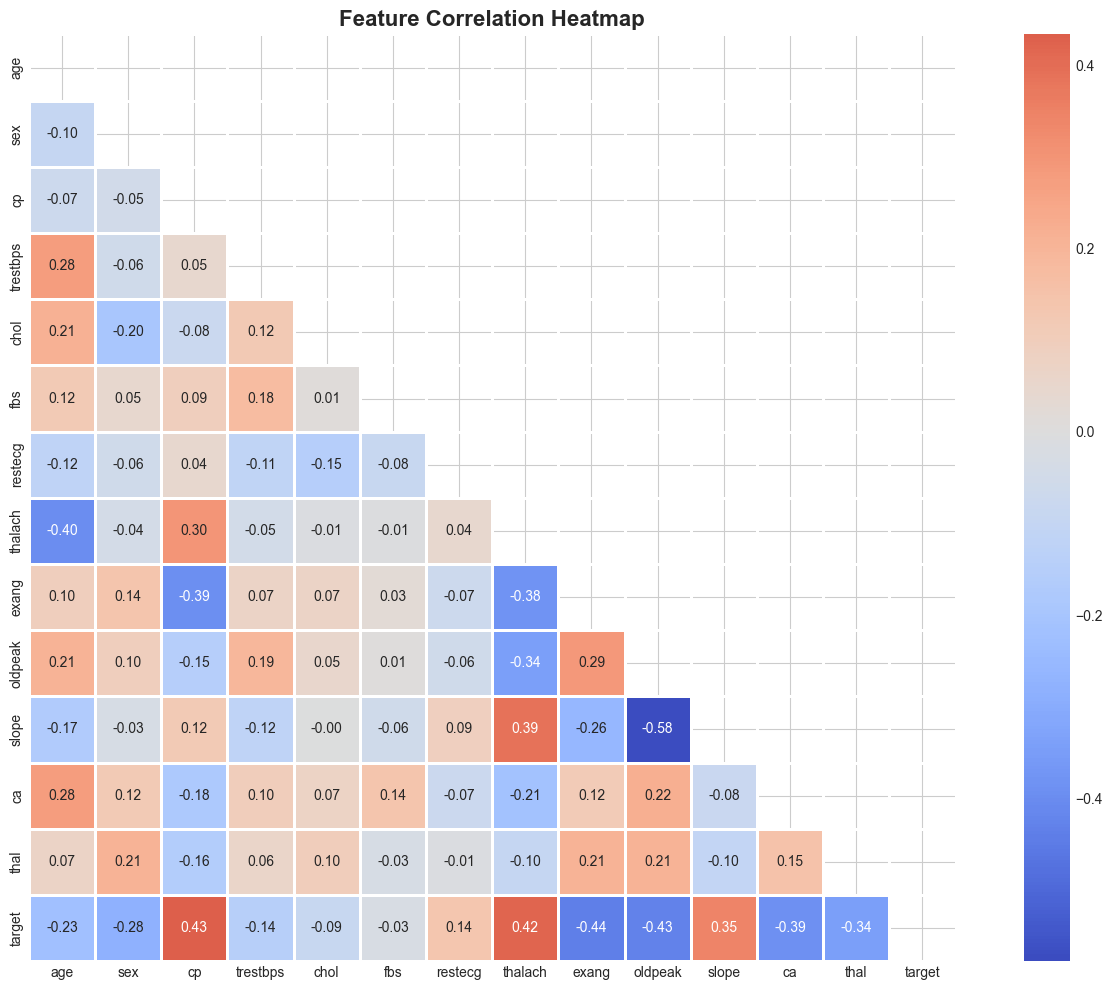


Top Correlations with Target:
exang      0.436757
cp         0.433798
oldpeak    0.430696
thalach    0.421741
ca         0.391724
Name: target, dtype: float64


In [7]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation = heart_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, mask=mask)
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target
print("\nTop Correlations with Target:")
print(correlation['target'].abs().sort_values(ascending=False)[1:6])

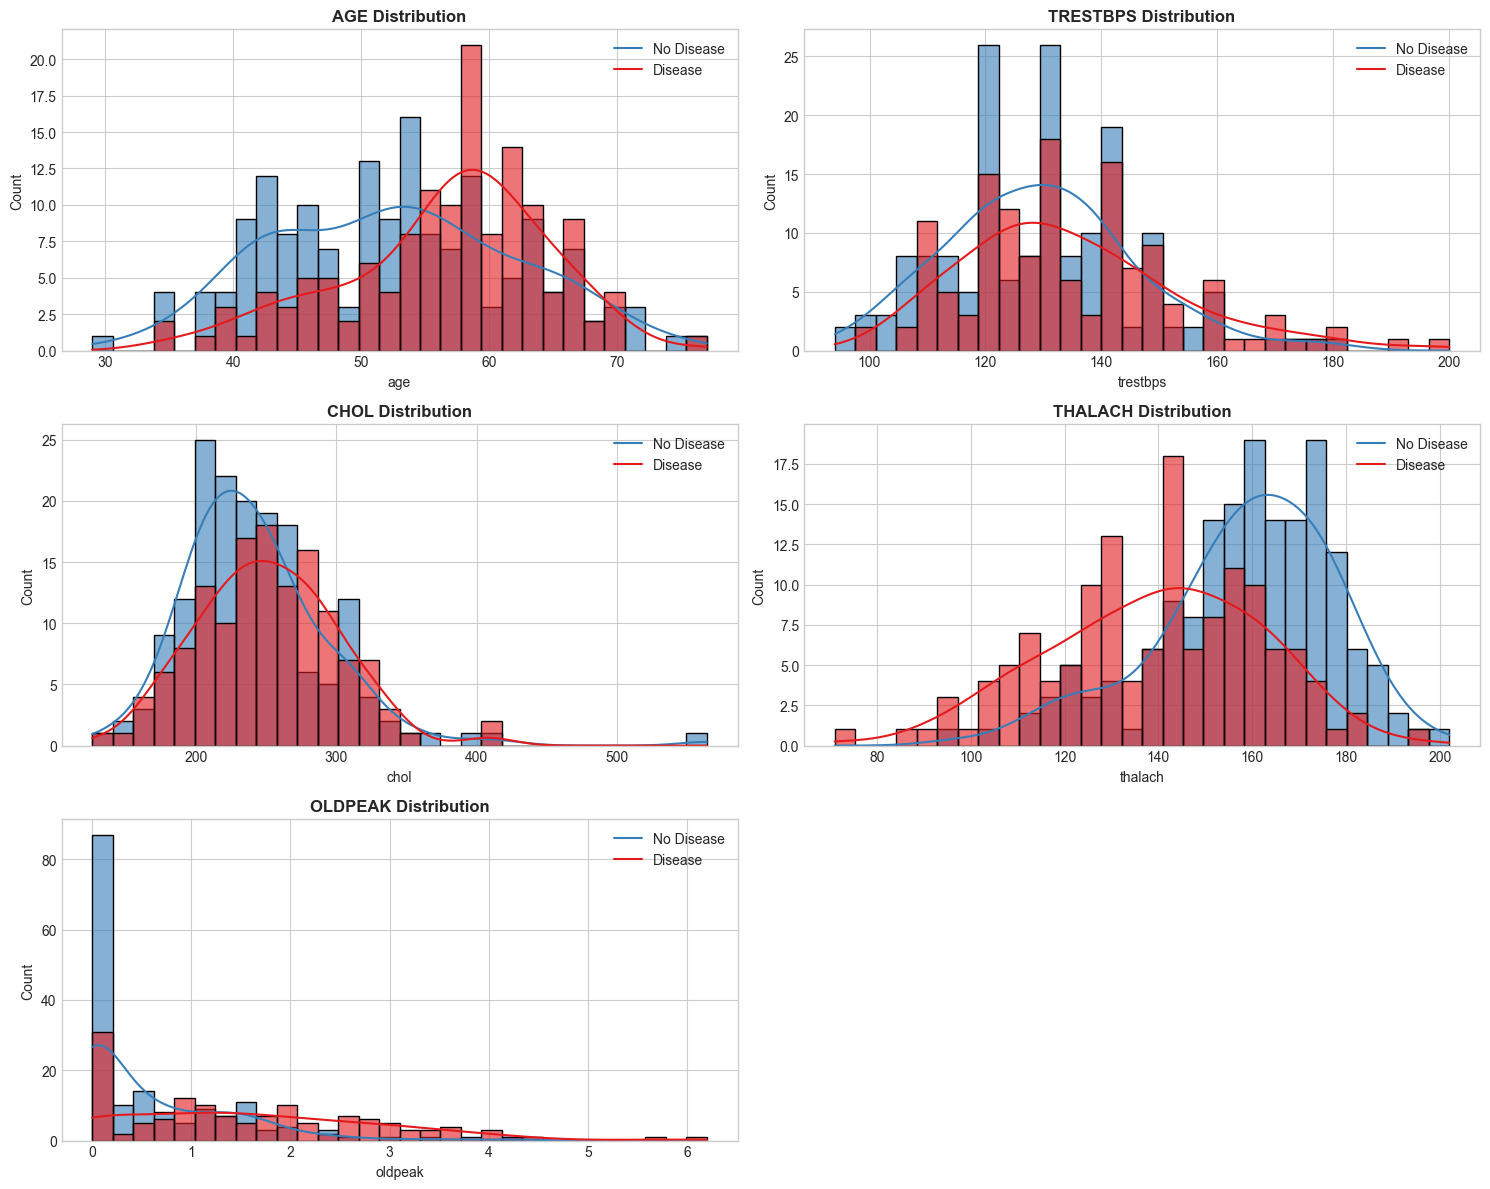

In [8]:
# Numerical Feature Distributions
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.histplot(data=heart_data, x=col, hue='target', kde=True, 
                 ax=axes[idx], bins=30, palette='Set1', alpha=0.6)
    axes[idx].set_title(f'{col.upper()} Distribution', fontweight='bold')
    axes[idx].legend(['No Disease', 'Disease'])

fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

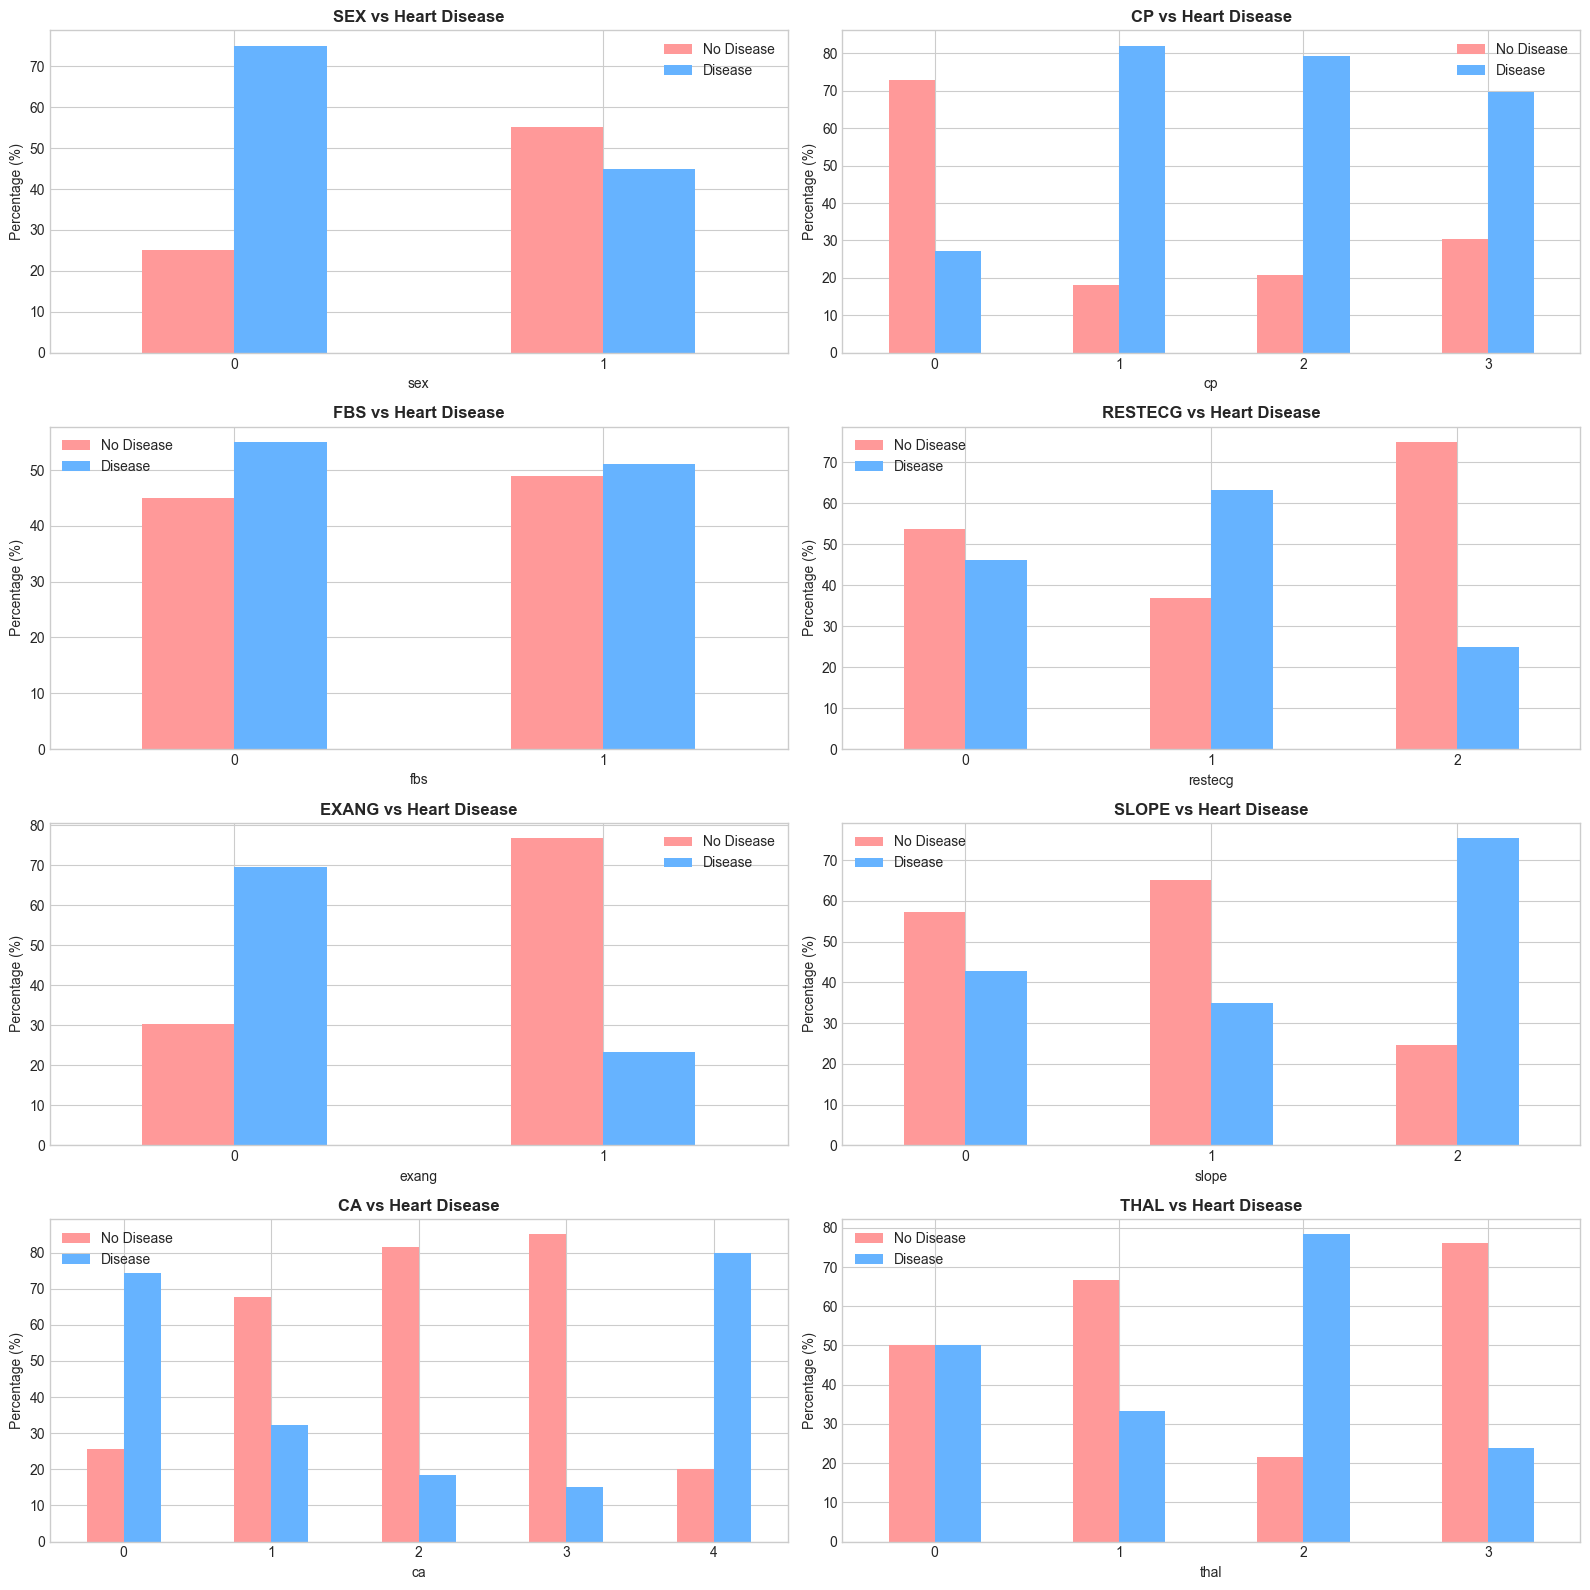

In [9]:
# Categorical Feature Analysis
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    ct = pd.crosstab(heart_data[col], heart_data['target'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=['#ff9999', '#66b3ff'])
    axes[idx].set_title(f'{col.upper()} vs Heart Disease', fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['No Disease', 'Disease'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

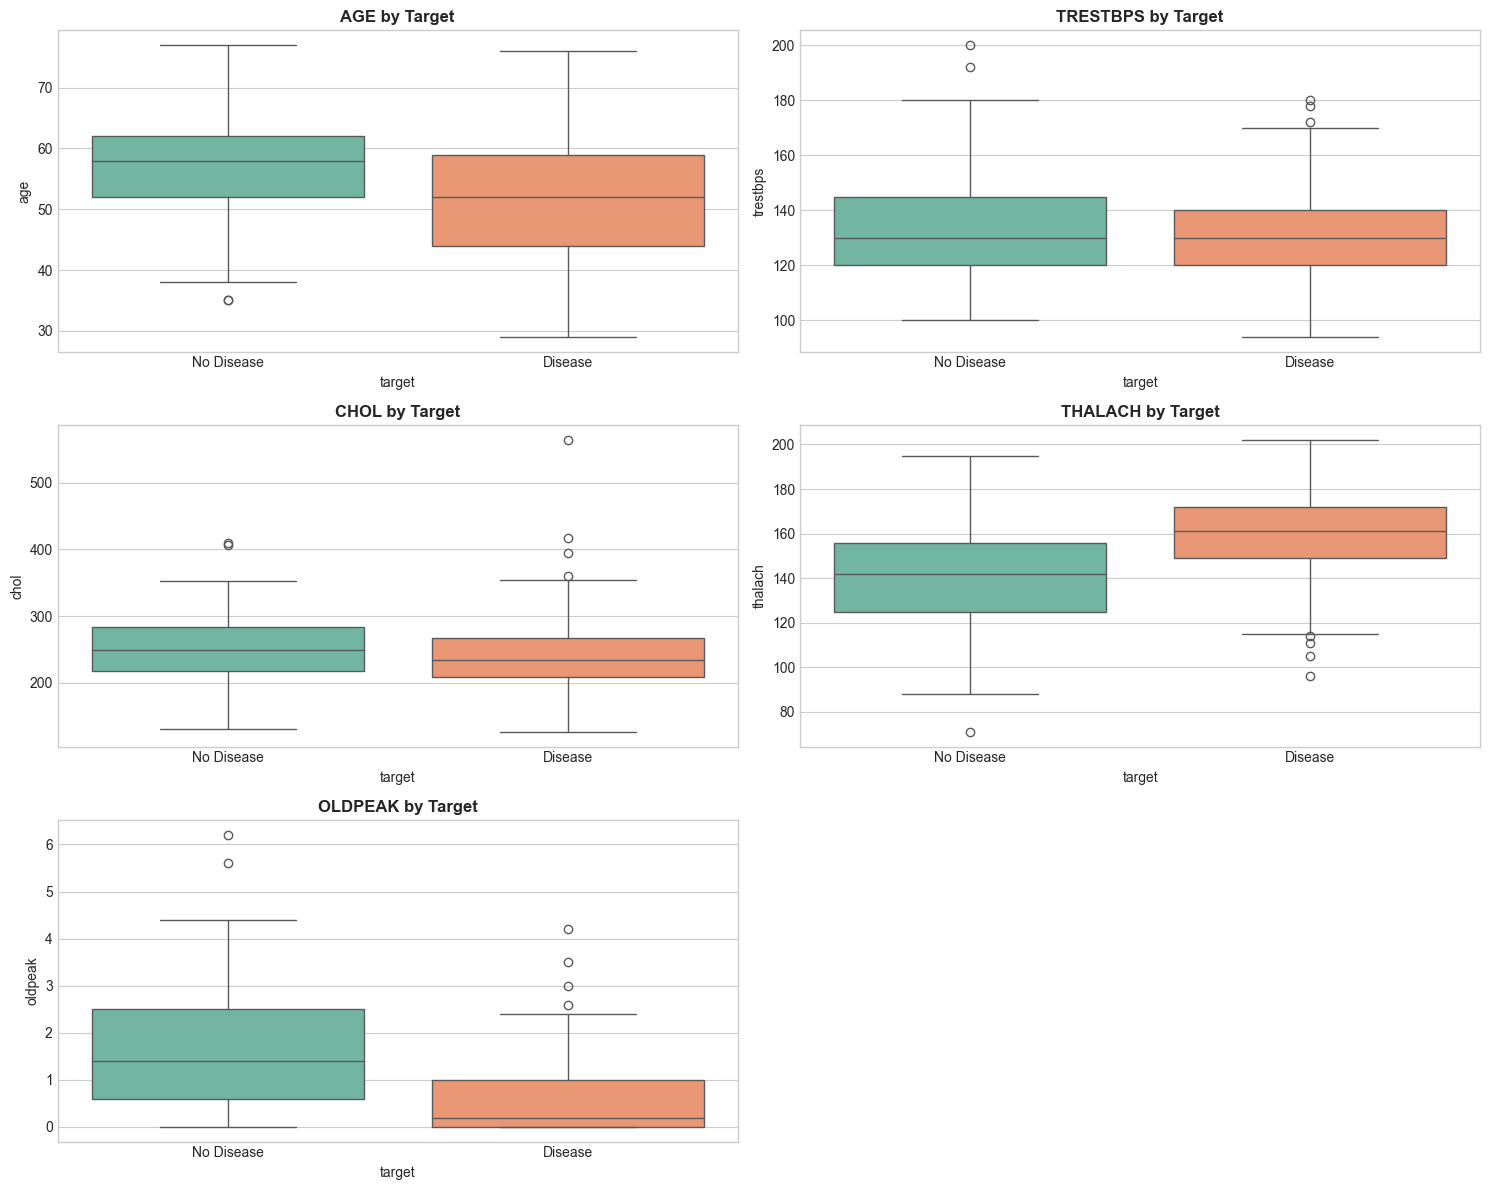

In [10]:
# Boxplots for Outlier Detection
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=heart_data, x='target', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col.upper()} by Target', fontweight='bold')
    axes[idx].set_xticklabels(['No Disease', 'Disease'])

fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Data Preprocessing

In [11]:
# Separate features and target
X = heart_data.drop(columns='target')
y = heart_data['target']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining: {X_train.shape}")
print(f"Test: {X_test.shape}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Scaling completed!")

Features: (303, 13)
Target: (303,)

Training: (242, 13)
Test: (61, 13)

✅ Scaling completed!


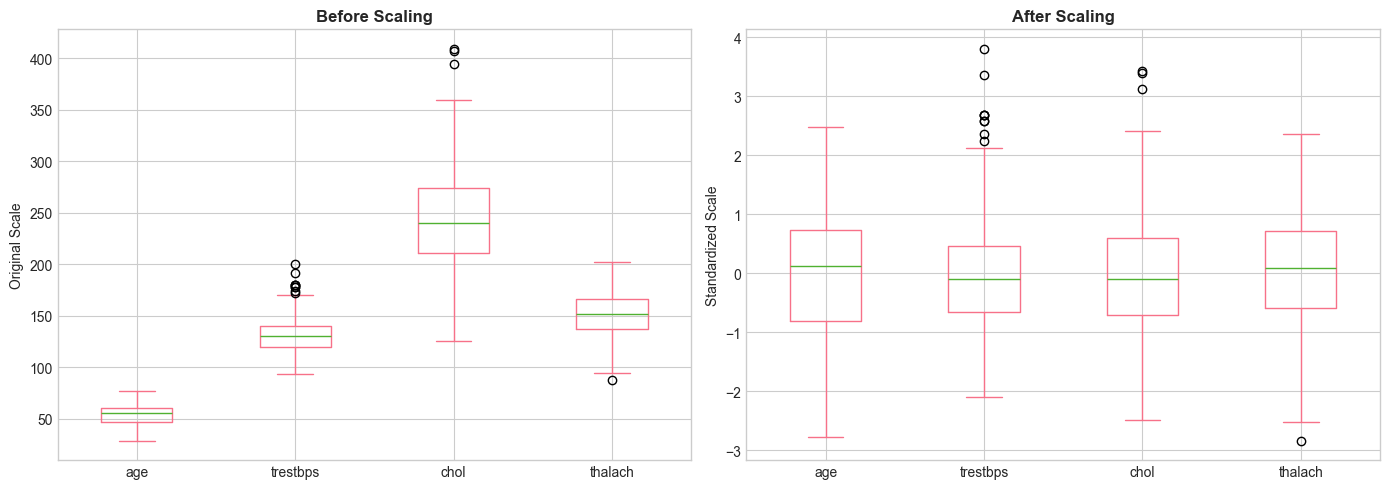

In [12]:
# Visualize Scaling Effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

X_train[['age', 'trestbps', 'chol', 'thalach']].plot(kind='box', ax=axes[0])
axes[0].set_title('Before Scaling', fontweight='bold')
axes[0].set_ylabel('Original Scale')

pd.DataFrame(X_train_scaled, columns=X.columns)[['age', 'trestbps', 'chol', 'thalach']].plot(kind='box', ax=axes[1])
axes[1].set_title('After Scaling', fontweight='bold')
axes[1].set_ylabel('Standardized Scale')

plt.tight_layout()
plt.savefig('scaling_effect.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Model Training (8 Models)

In [13]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate
results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Overfitting': train_acc - test_acc
    })
    
    trained_models[name] = model
    print(f"✅ {name}: Test Accuracy = {test_acc:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results).sort_values('Test Acc', ascending=False)
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
results_df

✅ Logistic Regression: Test Accuracy = 0.8033
✅ Random Forest: Test Accuracy = 0.8361
✅ Gradient Boosting: Test Accuracy = 0.8197
✅ SVM: Test Accuracy = 0.8197
✅ KNN: Test Accuracy = 0.8033
✅ Decision Tree: Test Accuracy = 0.7869
✅ Naive Bayes: Test Accuracy = 0.8197
✅ AdaBoost: Test Accuracy = 0.8197

MODEL COMPARISON


,Model,Train Acc,Test Acc,Precision,Recall,F1-Score,ROC-AUC,Overfitting
1,Random Forest,1.000000,0.836066,0.780488,0.969697,0.864865,0.909091,0.163934
2,Gradient Boosting,0.995868,0.819672,0.789474,0.909091,0.845070,0.878788,0.176196
3,SVM,0.913223,0.819672,0.775000,0.939394,0.849315,0.883117,0.093551
7,AdaBoost,0.904959,0.819672,0.789474,0.909091,0.845070,0.887446,0.085287
6,Naive Bayes,0.842975,0.819672,0.789474,0.909091,0.845070,0.875541,0.023303
0,Logistic Regression,0.842975,0.803279,0.769231,0.909091,0.833333,0.869048,0.039697
4,KNN,0.871901,0.803279,0.769231,0.909091,0.833333,0.863095,0.068622
5,Decision Tree,0.925620,0.786885,0.750000,0.909091,0.821918,0.817641,0.138735


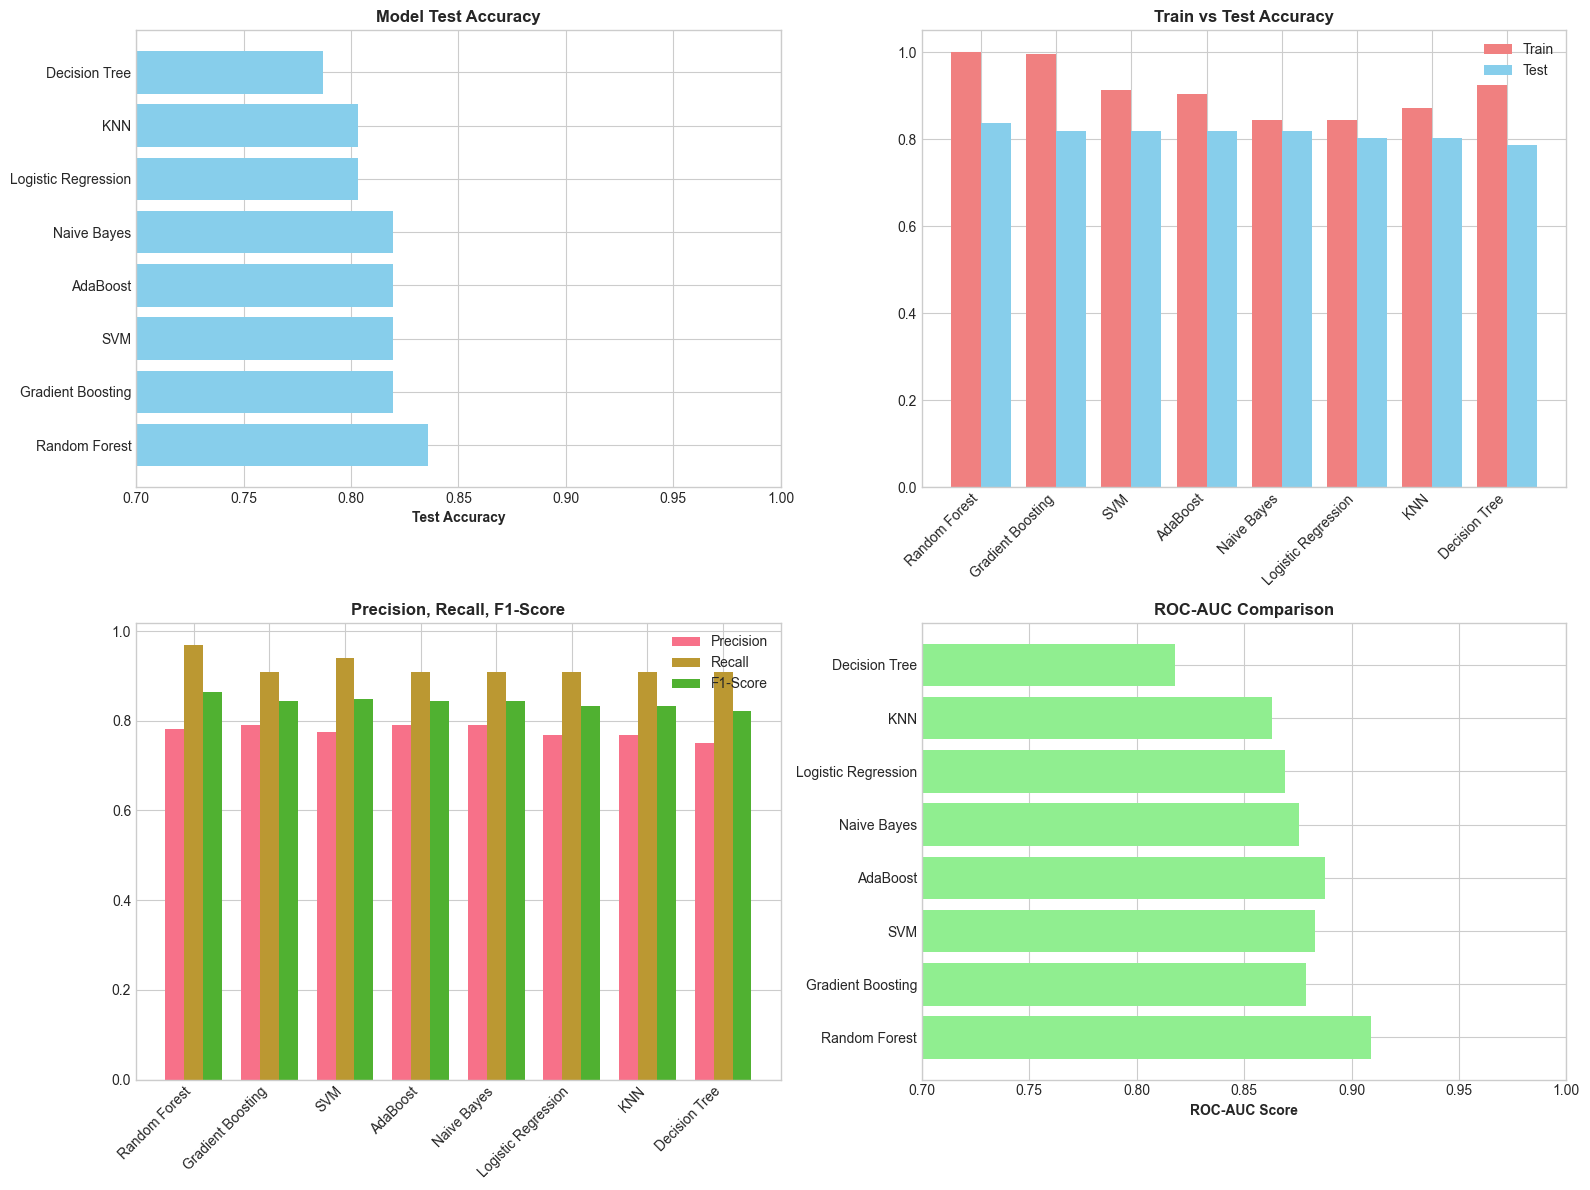

In [14]:
# Visualize Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test Accuracy
axes[0, 0].barh(results_df['Model'], results_df['Test Acc'], color='skyblue')
axes[0, 0].set_xlabel('Test Accuracy', fontweight='bold')
axes[0, 0].set_title('Model Test Accuracy', fontweight='bold')
axes[0, 0].set_xlim([0.7, 1.0])

# Train vs Test
x = np.arange(len(results_df))
axes[0, 1].bar(x - 0.2, results_df['Train Acc'], 0.4, label='Train', color='lightcoral')
axes[0, 1].bar(x + 0.2, results_df['Test Acc'], 0.4, label='Test', color='skyblue')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].set_title('Train vs Test Accuracy', fontweight='bold')
axes[0, 1].legend()

# Precision, Recall, F1
axes[1, 0].bar(x - 0.25, results_df['Precision'], 0.25, label='Precision')
axes[1, 0].bar(x, results_df['Recall'], 0.25, label='Recall')
axes[1, 0].bar(x + 0.25, results_df['F1-Score'], 0.25, label='F1-Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 0].set_title('Precision, Recall, F1-Score', fontweight='bold')
axes[1, 0].legend()

# ROC-AUC
axes[1, 1].barh(results_df['Model'], results_df['ROC-AUC'], color='lightgreen')
axes[1, 1].set_xlabel('ROC-AUC Score', fontweight='bold')
axes[1, 1].set_title('ROC-AUC Comparison', fontweight='bold')
axes[1, 1].set_xlim([0.7, 1.0])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Cross-Validation Analysis

In [15]:
# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_results.append({
        'Model': name,
        'Mean CV': cv_scores.mean(),
        'Std CV': cv_scores.std()
    })
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

cv_results_df = pd.DataFrame(cv_results).sort_values('Mean CV', ascending=False)
cv_results_df

Logistic Regression: 0.8136 (±0.1007)
Random Forest: 0.7974 (±0.0772)
Gradient Boosting: 0.7687 (±0.0902)
SVM: 0.7974 (±0.0611)
KNN: 0.8139 (±0.0661)
Decision Tree: 0.7229 (±0.1089)
Naive Bayes: 0.8178 (±0.1124)
AdaBoost: 0.7935 (±0.0857)


,Model,Mean CV,Std CV
6,Naive Bayes,0.817772,0.112398
4,KNN,0.813946,0.066119
0,Logistic Regression,0.813605,0.100710
3,SVM,0.797449,0.061136
1,Random Forest,0.797449,0.077152
7,AdaBoost,0.793452,0.085714
2,Gradient Boosting,0.768707,0.090218
5,Decision Tree,0.722874,0.108910


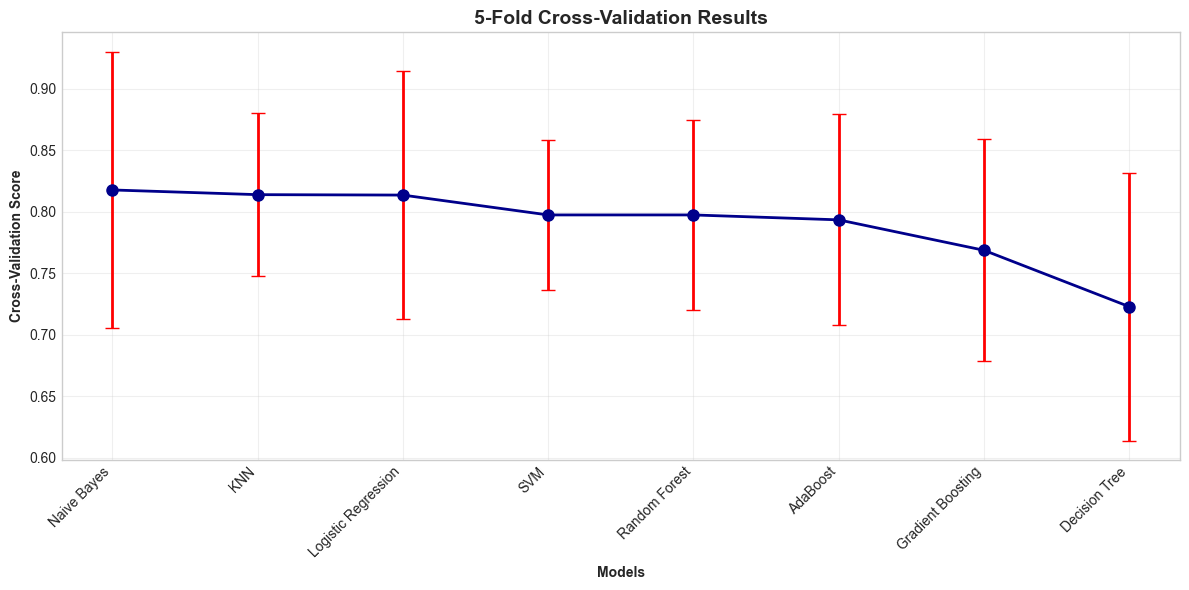

In [16]:
# Visualize CV Results
plt.figure(figsize=(12, 6))
plt.errorbar(cv_results_df['Model'], cv_results_df['Mean CV'], 
             yerr=cv_results_df['Std CV'], fmt='o-', capsize=5, 
             markersize=8, linewidth=2, color='darkblue', ecolor='red')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Cross-Validation Score', fontweight='bold')
plt.title('5-Fold Cross-Validation Results', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Best Model Evaluation

In [17]:
# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"🏆 Best Model: {best_model_name}")
print(f"Test Accuracy: {results_df.iloc[0]['Test Acc']:.4f}")

# Predictions
y_test_pred = best_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Disease']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Metrics:")
print(f"Sensitivity (Recall): {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"PPV: {tp/(tp+fp):.4f}")
print(f"NPV: {tn/(tn+fn):.4f}")

🏆 Best Model: Random Forest
Test Accuracy: 0.8361

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.95      0.68      0.79        28
     Disease       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61


Confusion Matrix Metrics:
Sensitivity (Recall): 0.9697
Specificity: 0.6786
PPV: 0.7805
NPV: 0.9500


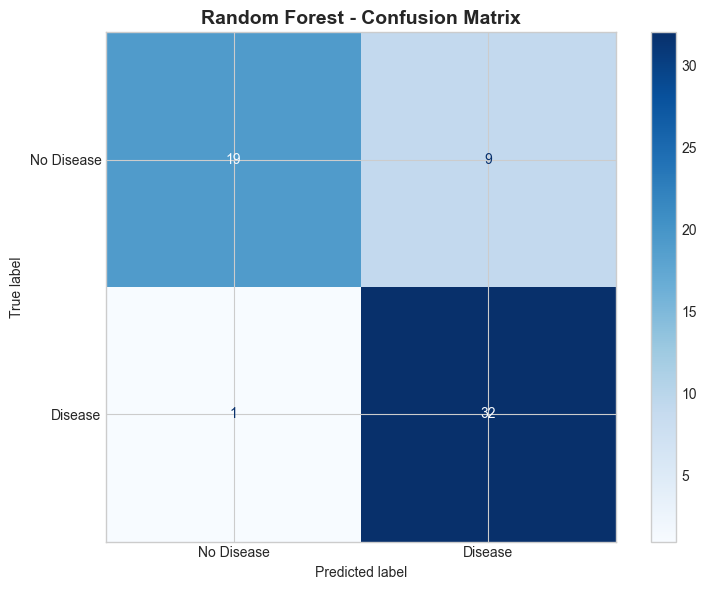

In [18]:
# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f'{best_model_name} - Confusion Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. ROC Curve Analysis

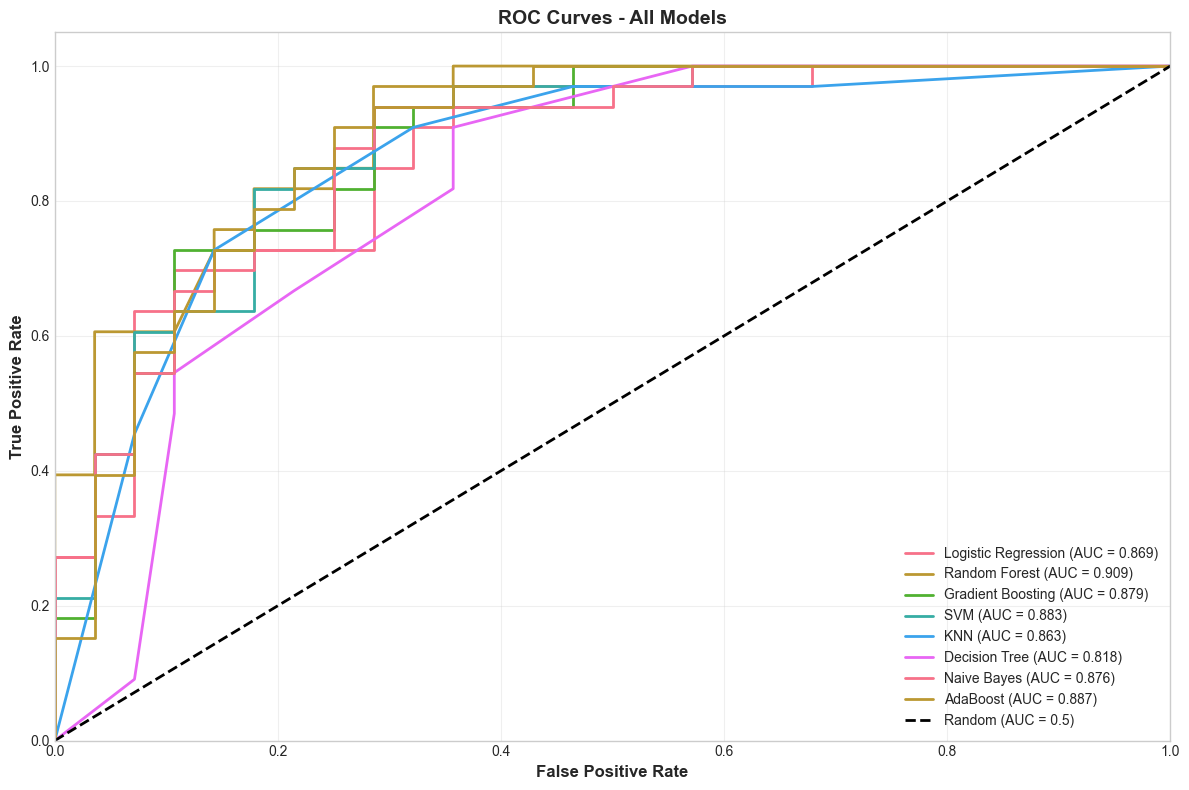

In [19]:
# ROC Curves for all models
plt.figure(figsize=(12, 8))

for name, model in trained_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - All Models', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Feature Importance Analysis

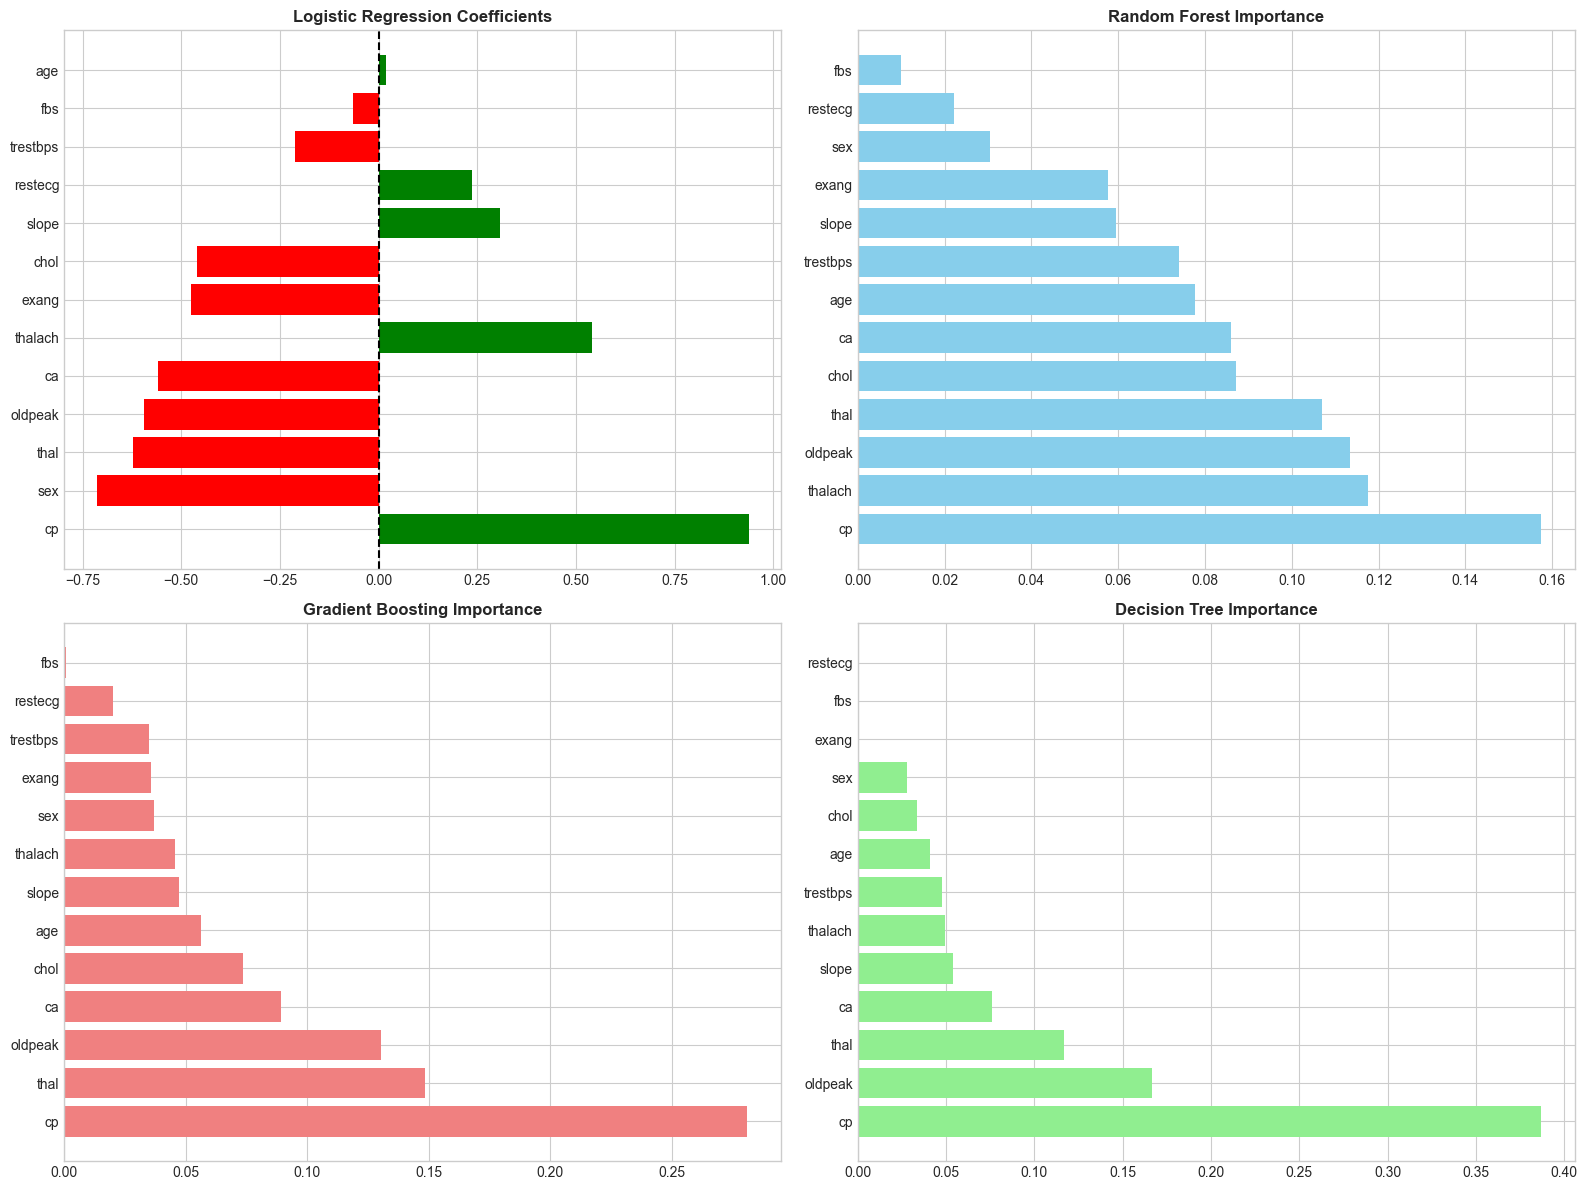


Top 5 Important Features (Random Forest):
    Feature  Importance
2        cp    0.157392
7   thalach    0.117491
9   oldpeak    0.113399
12     thal    0.107062
4      chol    0.087131


In [20]:
# Feature Importance for tree-based models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Logistic Regression Coefficients
lr_model = trained_models['Logistic Regression']
lr_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_[0]}).sort_values('Coefficient', key=abs, ascending=False)
axes[0, 0].barh(lr_coef['Feature'], lr_coef['Coefficient'], color=['red' if x < 0 else 'green' for x in lr_coef['Coefficient']])
axes[0, 0].set_title('Logistic Regression Coefficients', fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='--')

# Random Forest
rf_model = trained_models['Random Forest']
rf_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
axes[0, 1].barh(rf_imp['Feature'], rf_imp['Importance'], color='skyblue')
axes[0, 1].set_title('Random Forest Importance', fontweight='bold')

# Gradient Boosting
gb_model = trained_models['Gradient Boosting']
gb_imp = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model.feature_importances_}).sort_values('Importance', ascending=False)
axes[1, 0].barh(gb_imp['Feature'], gb_imp['Importance'], color='lightcoral')
axes[1, 0].set_title('Gradient Boosting Importance', fontweight='bold')

# Decision Tree
dt_model = trained_models['Decision Tree']
dt_imp = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False)
axes[1, 1].barh(dt_imp['Feature'], dt_imp['Importance'], color='lightgreen')
axes[1, 1].set_title('Decision Tree Importance', fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Important Features (Random Forest):")
print(rf_imp.head())

## 11. Hyperparameter Tuning

In [21]:
# Tune Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("🔍 Performing GridSearchCV...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n🏆 Best Parameters: {grid_search.best_params_}")
print(f"✅ Best CV Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_model = grid_search.best_estimator_
y_test_pred_tuned = tuned_model.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_test_pred_tuned)

print(f"✅ Test Accuracy (Tuned): {tuned_accuracy:.4f}")

🔍 Performing GridSearchCV...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

🏆 Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
✅ Best CV Score: 0.8433
✅ Test Accuracy (Tuned): 0.8197


## 12. Model Persistence

In [22]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save best model and scaler
joblib.dump(best_model, f'models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(tuned_model, 'models/tuned_random_forest.pkl')

# Save results
results_df.to_csv('models/model_comparison.csv', index=False)
cv_results_df.to_csv('models/cross_validation.csv', index=False)

print("✅ Models and results saved successfully!")

✅ Models and results saved successfully!


## 13. Prediction System

In [23]:
def validate_input(input_data):
    """Validate input data"""
    if len(input_data) != 13:
        raise ValueError(f"Expected 13 features, got {len(input_data)}")
    
    ranges = {
        'age': (29, 77), 'sex': (0, 1), 'cp': (0, 3),
        'trestbps': (94, 200), 'chol': (126, 564), 'fbs': (0, 1),
        'restecg': (0, 2), 'thalach': (71, 202), 'exang': (0, 1),
        'oldpeak': (0, 6.2), 'slope': (0, 2), 'ca': (0, 4), 'thal': (0, 3)
    }
    
    for i, (feature, (min_val, max_val)) in enumerate(ranges.items()):
        if not (min_val <= input_data[i] <= max_val):
            print(f"⚠️ Warning: {feature} = {input_data[i]} outside range [{min_val}, {max_val}]")
    return True

def predict_heart_disease(input_data):
    """Predict heart disease with validation"""
    validate_input(input_data)
    
    input_array = np.asarray(input_data).reshape(1, -1)
    input_df = pd.DataFrame(input_array, columns=X.columns)
    input_scaled = scaler.transform(input_df)
    
    prediction = best_model.predict(input_scaled)[0]
    
    if hasattr(best_model, 'predict_proba'):
        probability = best_model.predict_proba(input_scaled)[0]
        prob_disease = probability[1]
    else:
        prob_disease = None
    
    return prediction, prob_disease

# Test predictions
test_case_1 = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
pred, prob = predict_heart_disease(test_case_1)

print("\n🧪 Test Prediction:")
print(f"Input: {test_case_1}")
print(f"Result: {'❤️ DISEASE DETECTED' if pred == 1 else '✅ NO DISEASE'}")
if prob:
    print(f"Disease Probability: {prob*100:.2f}%")

test_case_2 = (45, 1, 0, 120, 200, 0, 1, 170, 0, 0.5, 1, 0, 2)
pred2, prob2 = predict_heart_disease(test_case_2)

print("\n🧪 Test Prediction 2:")
print(f"Input: {test_case_2}")
print(f"Result: {'❤️ DISEASE DETECTED' if pred2 == 1 else '✅ NO DISEASE'}")
if prob2:
    print(f"Disease Probability: {prob2*100:.2f}%")


🧪 Test Prediction:
Input: (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
Result: ✅ NO DISEASE
Disease Probability: 38.00%

🧪 Test Prediction 2:
Input: (45, 1, 0, 120, 200, 0, 1, 170, 0, 0.5, 1, 0, 2)
Result: ❤️ DISEASE DETECTED
Disease Probability: 85.00%


## 14. Final Summary

In [24]:
print("="*100)
print("📊 FINAL PROJECT SUMMARY")
print("="*100)
print(f"\n📅 Date: 2025-11-01 20:27:33")
print(f"👤 User: AyushMaurya13")
print(f"\n📁 Dataset: {len(heart_data)} samples, {len(X.columns)} features")
print(f"🎯 Target Classes: 2 (Binary Classification)")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"✅ Test Accuracy: {results_df.iloc[0]['Test Acc']*100:.2f}%")
print(f"✅ ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")
print(f"✅ F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"\n📈 Top 3 Important Features (Random Forest):")
for idx, row in rf_imp.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")
print(f"\n💾 Saved Files:")
print(f"   • Models: models/best_model_*.pkl, models/scaler.pkl")
print(f"   • Plots: *.png (10 visualizations)")
print(f"   • Results: models/model_comparison.csv")
print("\n✨ All improvements implemented successfully!")
print("="*100)

📊 FINAL PROJECT SUMMARY

📅 Date: 2025-11-01 20:27:33
👤 User: AyushMaurya13

📁 Dataset: 303 samples, 13 features
🎯 Target Classes: 2 (Binary Classification)

🏆 Best Model: Random Forest
✅ Test Accuracy: 83.61%
✅ ROC-AUC: 0.9091
✅ F1-Score: 0.8649

📈 Top 3 Important Features (Random Forest):
   3. cp: 0.1574
   8. thalach: 0.1175
   10. oldpeak: 0.1134

💾 Saved Files:
   • Models: models/best_model_*.pkl, models/scaler.pkl
   • Plots: *.png (10 visualizations)
   • Results: models/model_comparison.csv

✨ All improvements implemented successfully!
